---
title: 'Лабораторна робота 2. OpenCV. Геометричні перетворення зображення'
description:
   Документ зроблено за допомогою [Quarto](https://quarto.org/)
author: Гарагуля Денис
date: "10.18.2024"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

__Мета:__ _знайомство з методами геометричних перетворень бібліотеки OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python._

##### 3. Імпортувати  RGB-зображення `Image` з диску. Оцінити його розмір у пікселях $N \times M$ та об'єм пам'яті, який він займає на диску.
##### 4. Імпортувати RGB-зображення `Image` у напівтоновому форматі. Оцінити його розмір у пікселях та об'єм пам'яті, який він займає на диску. Порівняти результати з попередніми результатами. Пояснити результати.  

In [1]:
# Імпортуємо пакети
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# print(f'version cv2: {cv.__version__}')
print('version cv2: %s' % cv.__version__)

version cv2: 4.10.0


image shape/dimensions: (1724, 800, 3)
image number of pixels: 4137600
image size: 2356221 bytes
grey image shape/scale: (1724, 800)
grey image number of pixels: 1379200
grey image size: 824105 bytes


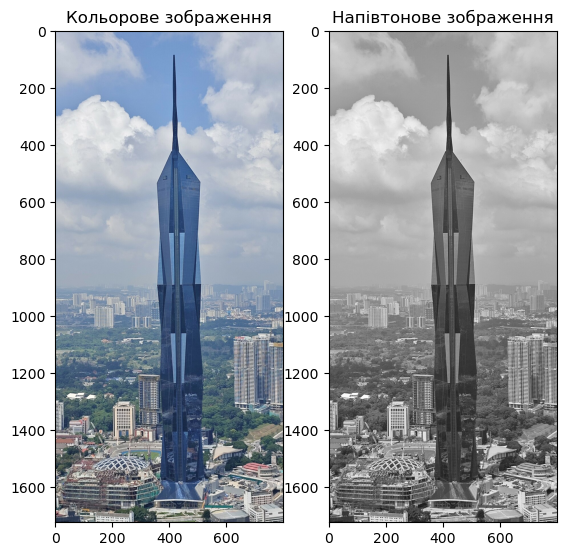

In [2]:
import cv2
import matplotlib.pyplot as plt
import os

# Завантажуємо RGB-зображення
image = cv2.imread('orig_images/Image.jpg')
cv2.imwrite('Image.png', image)

print(f'image shape/dimensions: {image.shape}')
print(f'image number of pixels: {image.size}')
print(f'image size: {os.stat('Image.png').st_size} bytes')

# Розділяємо зображення на канали
red, green, blue = cv2.split(image)
# Формуємо напівтонове зображення
image_grey = cv2.imread('orig_images/Image.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('grey_Image.png', image_grey)

print(f'grey image shape/scale: {image_grey.shape}')
print(f'grey image number of pixels: {image_grey.size}')
print(f'grey image size: {os.stat('grey_Image.png').st_size} bytes')

# Візуалізуємо зображення засобами Matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Кольорове зображення')

plt.subplot(132)
plt.imshow(image_grey, cmap='gray')
plt.title('Напівтонове зображення')

plt.show()

##### 5. Зменшити початкове RGB-зображення `Image` у $n$ разів, візуалізувати його, перевіривши результат масштабування, та експортувати його на диск. Чи змінився об'єм пам'яті, який він займає на диску? Обгрунтувати отриманий результат.

image shape/dimentions: (1724, 800, 3)
image number of pixel: 4137600
image size: 2356221 bytes
ress image shape/dimentions: (862, 400, 3)
ress image number of pixel: 1034400
ress image size: 638606 bytes


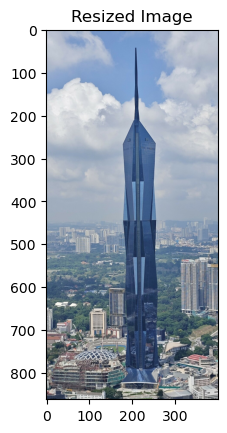

In [3]:
import cv2
import math
import matplotlib.pyplot as plt
import os
# Завантажуємо RGB-зображення
image = cv2.imread('orig_images/Image.jpg')
cv2.imwrite('Image.png', image)
print(f'image shape/dimentions: {image.shape}')
print(f'image number of pixel: {image.size}')
print(f'image size: {os.stat('Image.png').st_size} bytes')

# Визначаємо новий розмір
rows, cols = image.shape[:2]
rows_resized = (math.floor(cols * 0.5), math.floor(rows * 0.5))

# Змінюємо розмір зображення
image_resize = cv2.resize(image, rows_resized, interpolation=cv2.INTER_AREA)
cv2.imwrite('resized_Image.png', image_resize)
print(f'ress image shape/dimentions: {image_resize.shape}')
print(f'ress image number of pixel: {image_resize.size}')
print(f'ress image size: {os.stat('resized_Image.png').st_size} bytes')

# Візуалізуємо результат за допомогою Matplotlib
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.show()

Отже, зменшене зображення має відповідно меньше пікселів і важить меньше порівняно з оригінальним зображенням

##### 6. Написати функцію, яка буде виконувати пропорційне зменшення початкового зображення розміром $N \times M$ пікселей відповідно до вимоги, щоби зменешене зображення мало ширину $K$ пікселей.

image shape/dimentions: (1724, 800, 3)
image number of pixel: 4137600


Введіть бажану ширину:  50


ress image shape/dimentions: (107, 50, 3)
ress image number of pixel: 16050


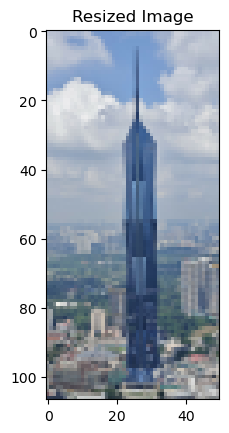

In [4]:
import cv2
import math
import matplotlib.pyplot as plt

def refactorTo(image, width):
    #curWidth = image.shape[1]
    # Визначаємо новий розмір
    rows, cols = image.shape[:2]
    rows_resized = (math.floor(width), math.floor(rows / cols * width))
    return cv2.resize(image, rows_resized, interpolation=cv2.INTER_AREA)
# Завантажуємо RGB-зображення
image = cv2.imread('orig_images/Image.jpg')

print(f'image shape/dimentions: {image.shape}')
print(f'image number of pixel: {image.size}')

user_width = int(input("Введіть бажану ширину: "))
# Змінюємо розмір зображення
image_resize = refactorTo(image, user_width)
cv2.imwrite('resized_to_K_Image.png', image_resize)
print(f'ress image shape/dimentions: {image_resize.shape}')
print(f'ress image number of pixel: {image_resize.size}')


# Візуалізуємо результат за допомогою Matplotlib
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.show()

##### 7. Зробити фото __розвороту власної залікової книжки__ з перспективним викривленням на фоні письмового столу. Вирізати зону із заліковкою та виконати афінні та перспективні перетворення за трьома точками точками і візуалізовані. В кожному випадку результати мають бути записані на диск.

image shape/dimentions: (835, 1280, 3)
image number of pixel: 3206400
image shape/dimentions: (580, 1058, 3)
image number of pixel: 1840920


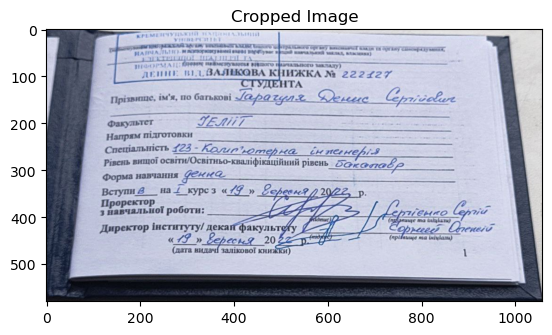

In [5]:
import cv2
import matplotlib.pyplot as plt

# Завантажуємо RGB-зображення
image = cv2.imread('orig_images/salikova.jpg')
print(f'image shape/dimentions: {image.shape}')
print(f'image number of pixel: {image.size}')

# Вирізаємо діапазон пікселів
image_cropped = image[150:730, 128:1186]
print(f'image shape/dimentions: {image_cropped.shape}')
print(f'image number of pixel: {image_cropped.size}')
cv2.imwrite('cropped_salikova.png', image_cropped)
# Візуалізуємо результат за допомогою Matplotlib
plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()


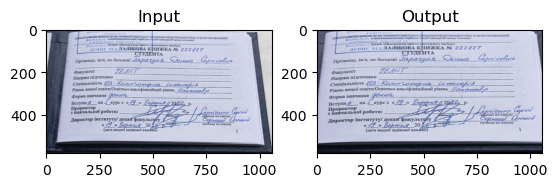

In [6]:
rows, cols, ch = image_cropped.shape
points_input = np.float32( # три вхідних точки
    [
        [72, 0],
        [987, 15],
        [529, 580]
    ]
)

points_output = np.float32( # три вихідних точки
    [
        [0, 0],
        [1058, 0],
        [529, 580]
    ]
)

# Задаємо матрицю афінних перетворень 2 х 3 
M_affine_trans = cv.getAffineTransform(points_input, points_output)

# Трансформуємо зображення
image_affine_trans = cv.warpAffine(image_cropped, M_affine_trans, (cols, rows))

cv2.imwrite('affine_trans_salikova.png', image_affine_trans)

plt.subplot(121)
plt.imshow(cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(122)
plt.imshow(cv2.cvtColor(image_affine_trans, cv2.COLOR_BGR2RGB))
plt.title('Output')
plt.show()

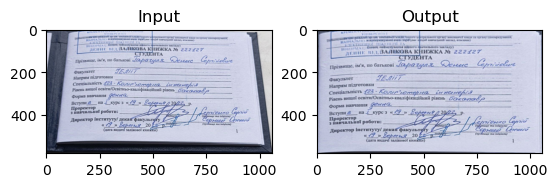

In [7]:
salikova = cv2.imread('cropped_salikova.png')
points_input = np.float32(
    [
        [100, 0],
        [50, 530],
        [965, 15],
        [1025, 535]
    ]
)

points_output = np.float32(
    [
        [0, 0],
        [0, 580],
        [1058, 0],
        [1058, 580]
    ]
)

M = cv.getPerspectiveTransform(points_input, points_output)

# Трансформуємо зображення
perspective = cv.warpPerspective(salikova, M, (1058, 580))

cv2.imwrite('perspective_trans_salikova.png', perspective)

plt.subplot(121)
plt.imshow(cv2.cvtColor(salikova, cv2.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(122)
plt.imshow(cv2.cvtColor(perspective, cv2.COLOR_BGR2RGB))
plt.title('Output')
plt.show()

## Контрольні запитання

1. У чому полягає сенс афінних перетворень?
    * У збережені паралельності усіх прямих
1. Чи є оперції трансляції, масштабування і повороту афінними? Відповідь обгрунтувати.
    * Так, оскільки ми не деформуємо якісь окремі фрагменти зображення, але змінюємо все зображення цілком, перевірити це можна співставивши взаємне розташування трьох точок на оригінальному зображені і цих же точок на зміненому
1. Чи є перспективні перетворення частинним випадком афінних перетворень? Відповідь обгрунтувати.
    * Може бути афінним, оскільки може бути використаним для звичайного розвороту зображення, без жодних деформацій